# London Crime Data 2008-2016

Dataset ini digunakan untuk menganalisis kejahatan di London selama beberapa tahun. Berikut adalah penjelasan tentang fitur-fitur yang ada dalam dataset tersebut:

1. lsoa_code: Ini adalah kode yang mewakili "Lower-layer Super Output Area" (LSOA), yaitu unit geografis kecil yang digunakan untuk pelaporan statistik di Inggris.

2. borough: Nama borough atau distrik di London di mana kejahatan tersebut dilaporkan.

3. major_category: Kategori utama dari jenis kejahatan yang dilaporkan, seperti "Violence Against the Person" atau "Burglary."

4. minor_category: Kategori kejahatan minor yang lebih spesifik dalam kategori utama, misalnya, "Harassment" atau "Robbery."

5. value: Jumlah insiden atau jumlah kejadian yang terkait dengan kategori kejahatan tertentu di wilayah tersebut.

6. year: Tahun ketika data kejahatan tersebut dilaporkan.

7. month: Bulan ketika data kejahatan tersebut dilaporkan.

In [1]:
import pandas as pd
import numpy as np

In [55]:
df_lon = pd.read_csv('london_crime_by_lsoa.csv')

In [56]:
df_lon.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


## Data Cleaning

In [57]:
df_lon.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [58]:
df_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [59]:
df_lon.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [60]:
duplicates = df_lon.duplicated()
print(duplicates)
total_duplicates = duplicates.sum()
print("Jumlah total duplikat:", total_duplicates)

0           False
1           False
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Length: 13490604, dtype: bool
Jumlah total duplikat: 0


In [61]:
print('data dimensions:', df_lon.shape)

data dimensions: (13490604, 7)


In [62]:
df_lon.head(20)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [63]:
%matplotlib inline
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle charts

mpl.style.use('ggplot') # optional: for ggplot-like style

mpl.__version__

'3.7.2'

In [64]:
df_lon["major_category"].value_counts()

major_category
Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: count, dtype: int64

In [65]:
df_lon["minor_category"].value_counts()

minor_category
Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug 

In [66]:
df_lon["borough"].value_counts()

borough
Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Ke

In [67]:
df_lon.sort_values(by='value', ascending=False, axis=0, inplace=True)
df_lon.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,E01004734,Westminster,Theft and Handling,Other Theft,286,2008,12
9579977,E01004734,Westminster,Theft and Handling,Other Theft,281,2009,1


In [68]:
# Menghapus kolom major_category dan minor_category
df_no_category = df_lon.drop(['major_category', 'minor_category'], axis=1)
df_no_category

,lsoa_code,borough,value,year,month
1608904,E01004234,Tower Hamlets,309,2012,6
13423472,E01004734,Westminster,300,2008,3
3277025,E01004734,Westminster,288,2008,11
12317524,E01004734,Westminster,286,2008,12
9579977,E01004734,Westminster,281,2009,1
...,...,...,...,...,...
5147980,E01000413,Bexley,0,2010,11
5147981,E01004402,Waltham Forest,0,2010,1
5147982,E01003684,Redbridge,0,2013,1
5147984,E01001026,Croydon,0,2008,8


## Area Plot

In [69]:
# Kelompokkan data berdasarkan 'borough' dan 'year' lalu hitung jumlah kejahatan
df_london = df_lon.groupby(['borough', 'year'])['value'].sum().reset_index()

# Mengurutkan data berdasarkan value terbanyak
df_london.sort_values(by='value', ascending=False, axis=0, inplace=True)
df_london.head()

,borough,year,value
292,Westminster,2012,59226
291,Westminster,2011,54243
293,Westminster,2013,53852
289,Westminster,2009,48456
296,Westminster,2016,48330


In [70]:
# Transpose
df_londonT = df_london.pivot(index='year', columns='borough', values='value')
df_londonT.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226


In [71]:
# Mengurutkan borough dengan total value terbanyak
df_TopBorough = df_lon.groupby(['borough'])['value'].sum().reset_index()
df_TopBorough.sort_values(by='value', ascending=False, axis=0, inplace=True)
df_TopBorough.head(5)

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024


In [72]:
# Membuat dataframe baru dari dataframe df_londonT dengan fitur borough 5 teratas
df_londonArea = df_londonT[['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham']]
df_londonArea

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


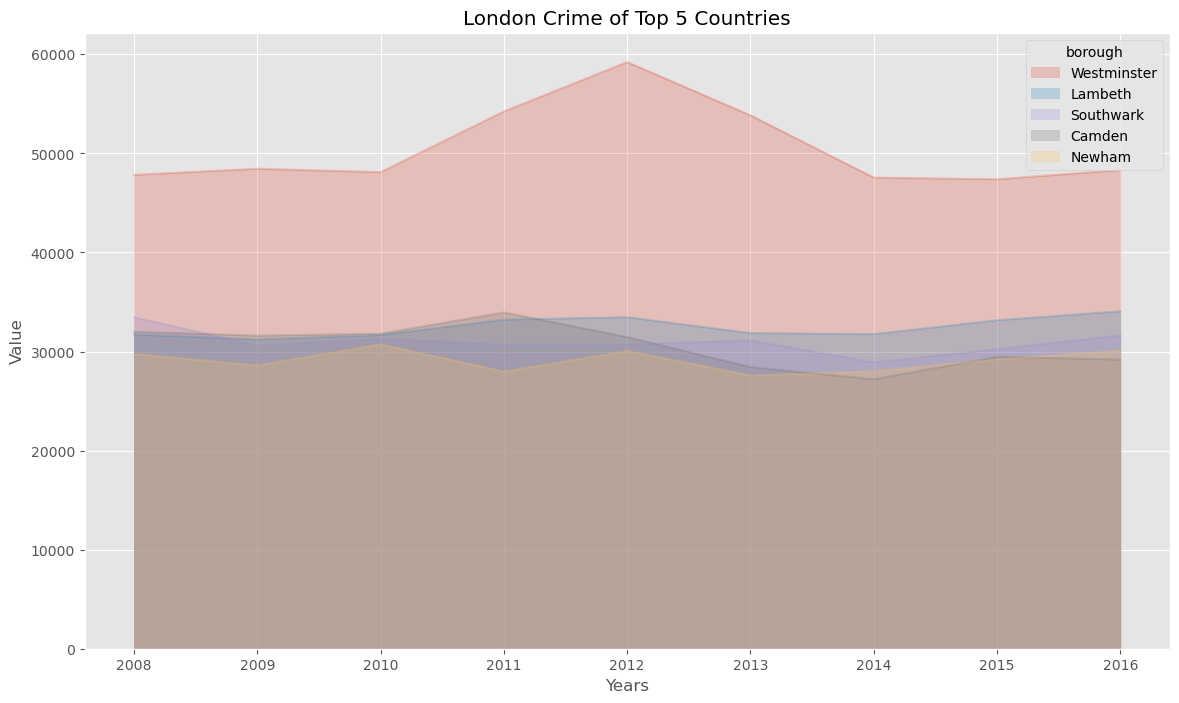

In [73]:
# Area plot
df_londonArea.plot(kind='area', stacked=False, figsize=(14,8), alpha=0.25)
plt.title('London Crime of Top 5 Countries') 
plt.ylabel('Value')
plt.xlabel('Years')
plt.show()

## Barchart

Membandingkan jumlah kejahatan perbulan pada tahun 2012 di distrik/borough westminster.

In [74]:
# Filter data untuk Westminster dan tahun 2012
df_wesminster = df_lon[(df_lon['borough'] == 'Westminster') & (df_lon['year'] == 2012)]

# Menghapus kolom major_category dan minor_category
df_wesminster = df_wesminster.drop(['major_category', 'minor_category'], axis=1)

# Menggabungkan data berdasarkan bulan dan menghitung total frekuensi kejahatan per bulan
df_wesminster_grouped = df_wesminster.groupby('month')['value'].sum().reset_index()
df_wesminster_grouped

,month,value
0,1,5084
1,2,4381
2,3,5362
3,4,4623
4,5,5104
5,6,4797
6,7,5428
7,8,5246
8,9,4341
9,10,4761


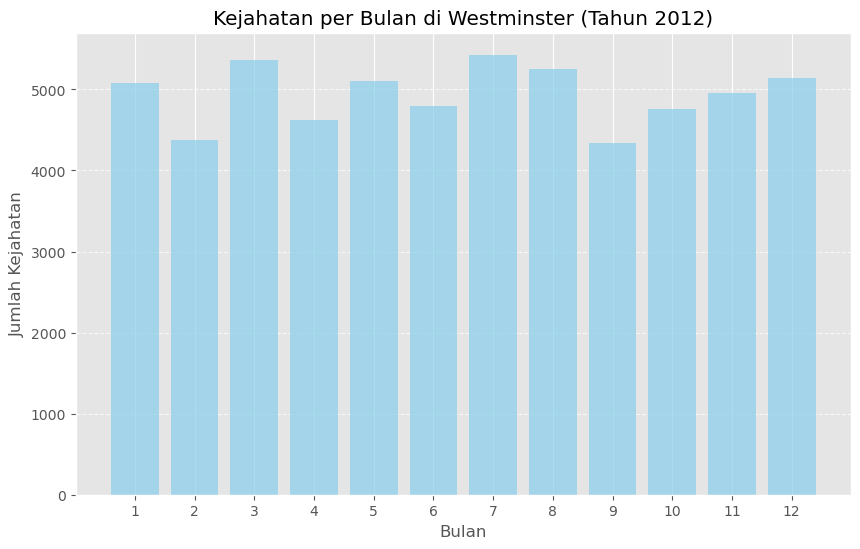

In [75]:
# Buat histogram frekuensi kejahatan per bulan
plt.figure(figsize=(10, 6))
plt.bar(df_wesminster_grouped['month'], df_wesminster_grouped['value'], color='skyblue', alpha=0.7)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejahatan')
plt.title('Kejahatan per Bulan di Westminster (Tahun 2012)')
plt.xticks(df_wesminster_grouped['month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [76]:
df_TopBorough.tail()

,borough,value
2,Bexley,114136
28,Sutton,100987
26,Richmond upon Thames,96771
20,Kingston upon Thames,89306
6,City of London,780


In [77]:
# Membuat dataframe baru dari dataframe df_londonT dengan fitur borough 5 teratas
df_westminster_london = df_londonT[['Westminster', 'City of London']]
df_westminster_london

borough,Westminster,City of London
year,,
2008,47846,0
2009,48456,0
2010,48116,0
2011,54243,69
2012,59226,157
2013,53852,110
2014,47564,115
2015,47395,151
2016,48330,178


## Histogram

In [78]:
# Hitung frekuensi kejahatan per kategori utama
crime_counts = df_lon['major_category'].value_counts()
crime_counts

major_category
Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: count, dtype: int64

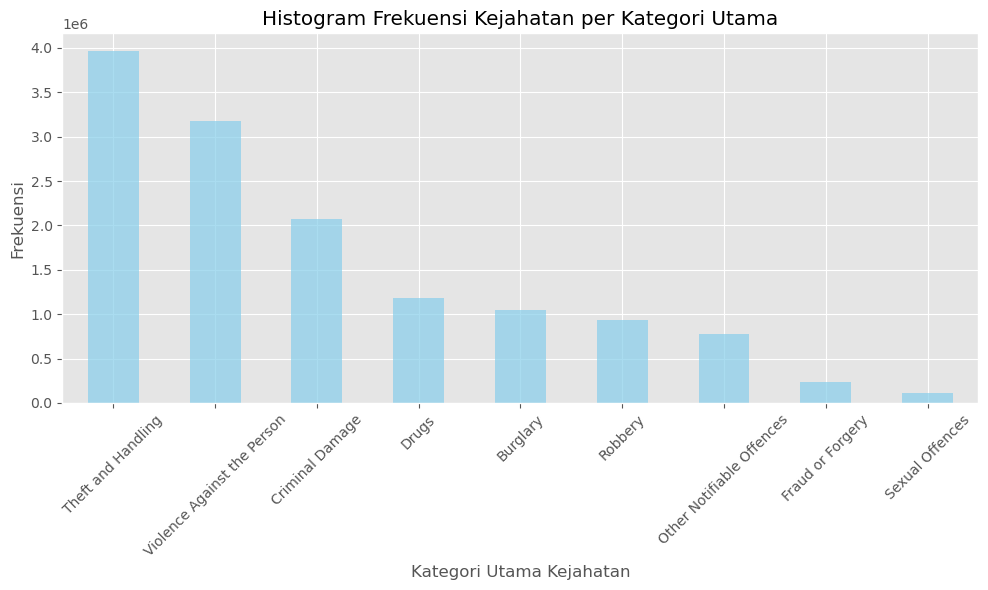

In [79]:
# Buat histogram
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar', color='skyblue', alpha=0.7)

# Atur label sumbu dan judul
plt.xlabel('Kategori Utama Kejahatan')
plt.ylabel('Frekuensi')
plt.title('Histogram Frekuensi Kejahatan per Kategori Utama')

# Tampilkan histogram
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

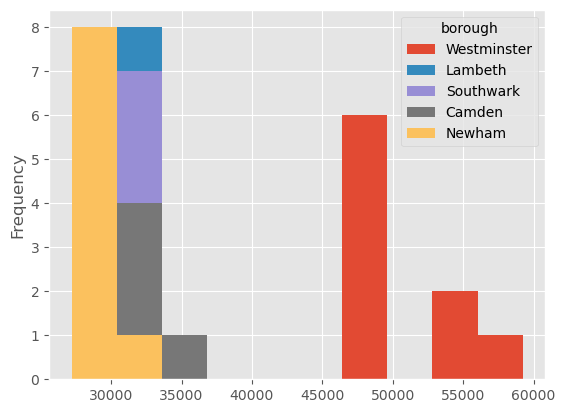

In [80]:
df_londonArea.plot.hist()

In [81]:
df_lon.head(20)

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,E01004734,Westminster,Theft and Handling,Other Theft,286,2008,12
9579977,E01004734,Westminster,Theft and Handling,Other Theft,281,2009,1
11201180,E01004734,Westminster,Theft and Handling,Other Theft,280,2009,12
2932492,E01033595,Westminster,Theft and Handling,Other Theft,280,2011,12
7942318,E01004734,Westminster,Theft and Handling,Other Theft,267,2008,7
12914969,E01004734,Westminster,Theft and Handling,Other Theft,262,2009,11
9164301,E01004734,Westminster,Theft and Handling,Other Theft,260,2009,3


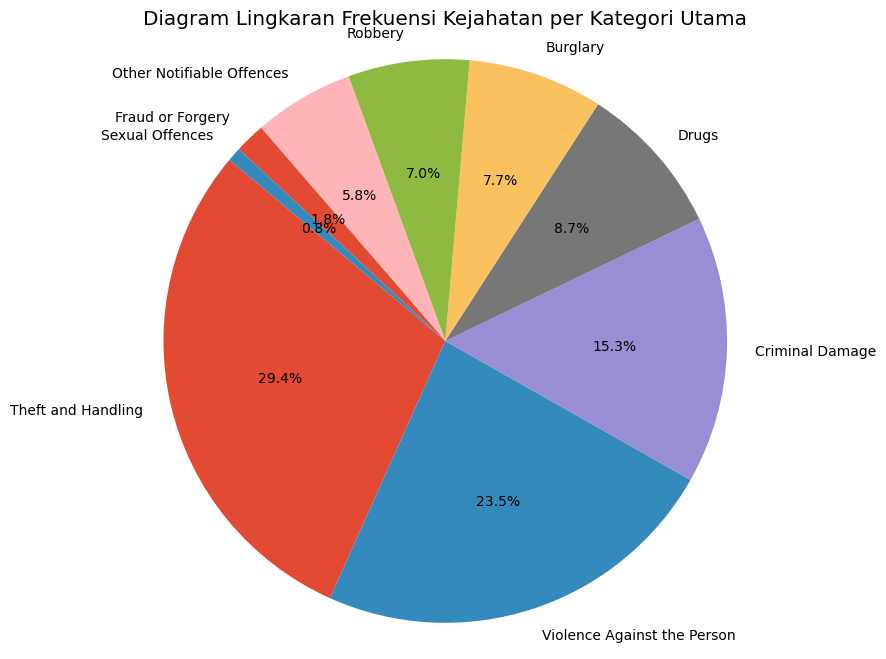

In [82]:
# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%', startangle=140)

# Atur judul
plt.title('Diagram Lingkaran Frekuensi Kejahatan per Kategori Utama')

# Tampilkan pie chart
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk lingkaran
plt.show()

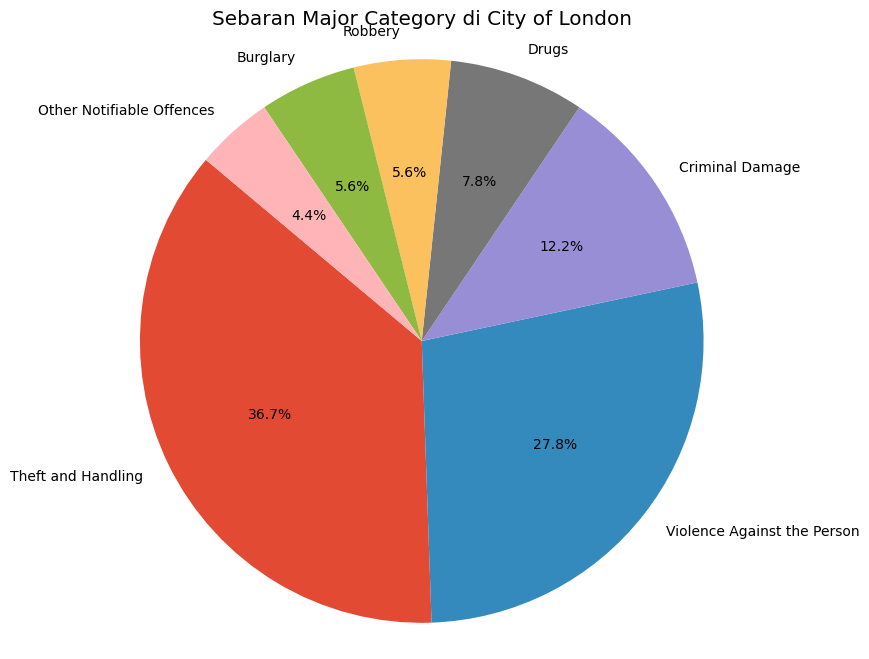

In [83]:
# Filter data untuk Borough "City of London" dan hitung jumlah major category
city_of_london_data = df_lon[df_lon['borough'] == 'City of London']
major_category_counts = city_of_london_data['major_category'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(major_category_counts, labels=major_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sebaran Major Category di City of London')
plt.axis('equal')  # Untuk membuat pie chart berbentuk lingkaran

# Tampilkan pie chart
plt.show()

## Boxplot

In [84]:
df_lon.head(20)

,lsoa_code,borough,major_category,minor_category,value,year,month
1608904,E01004234,Tower Hamlets,Drugs,Possession Of Drugs,309,2012,6
13423472,E01004734,Westminster,Theft and Handling,Other Theft,300,2008,3
3277025,E01004734,Westminster,Theft and Handling,Other Theft,288,2008,11
12317524,E01004734,Westminster,Theft and Handling,Other Theft,286,2008,12
9579977,E01004734,Westminster,Theft and Handling,Other Theft,281,2009,1
11201180,E01004734,Westminster,Theft and Handling,Other Theft,280,2009,12
2932492,E01033595,Westminster,Theft and Handling,Other Theft,280,2011,12
7942318,E01004734,Westminster,Theft and Handling,Other Theft,267,2008,7
12914969,E01004734,Westminster,Theft and Handling,Other Theft,262,2009,11
9164301,E01004734,Westminster,Theft and Handling,Other Theft,260,2009,3


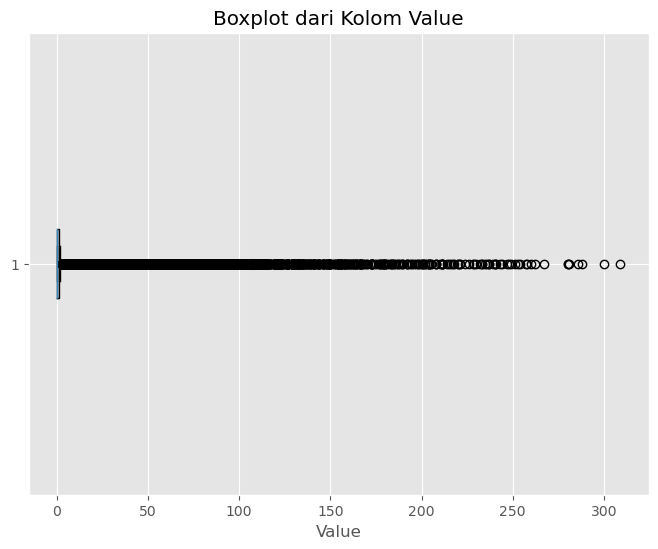

In [85]:
# Buat boxplot dari kolom 'value'
plt.figure(figsize=(8, 6))
plt.boxplot(df_lon['value'], vert=False)  # vert=False untuk boxplot horizontal
plt.title('Boxplot dari Kolom Value')
plt.xlabel('Value')
plt.show()

In [86]:
# # Buat boxplot dari kolom 'value'
# plt.figure(figsize=(8, 6))
# plt.boxplot(df_lon['borough'], vert=False)  # vert=False untuk boxplot horizontal
# plt.title('Boxplot dari Kolom Value')
# plt.xlabel('Value')
# plt.show()

<Axes: >

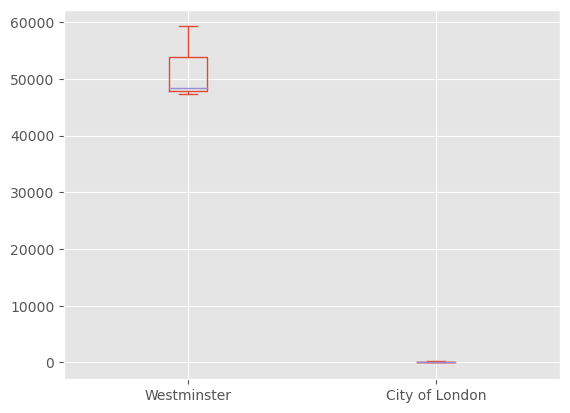

In [87]:
df_westminster_london.plot.box()

## Scatter Plot

In [88]:
df_no_category.head()

,lsoa_code,borough,value,year,month
1608904,E01004234,Tower Hamlets,309,2012,6
13423472,E01004734,Westminster,300,2008,3
3277025,E01004734,Westminster,288,2008,11
12317524,E01004734,Westminster,286,2008,12
9579977,E01004734,Westminster,281,2009,1


In [89]:
df_year = df_no_category.groupby('year')['value'].sum().reset_index()
df_year

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


<Axes: xlabel='year', ylabel='value'>

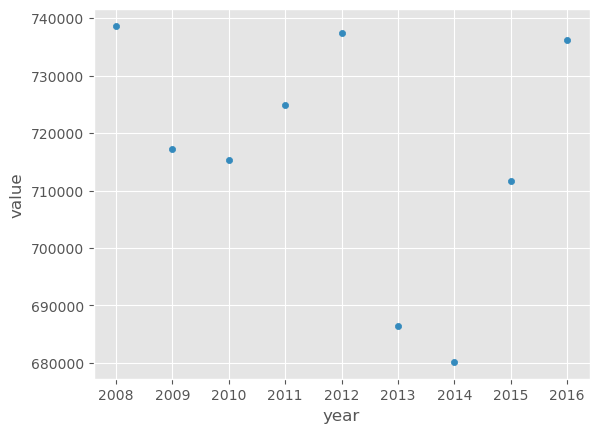

In [90]:
df_year.plot.scatter(x='year', y='value')
# dilihat dari plotnya berarti tidak ada korelasi antara value dan year. setiap tahun memiliki jumlah kejahatan beragam.

Scatter Plot dibawah ini untuk Menyoroti Kategori Mayor Tertentu: untuk menggambarkan hubungan antara "value" dan "year" pada kategori mayor tertentu.

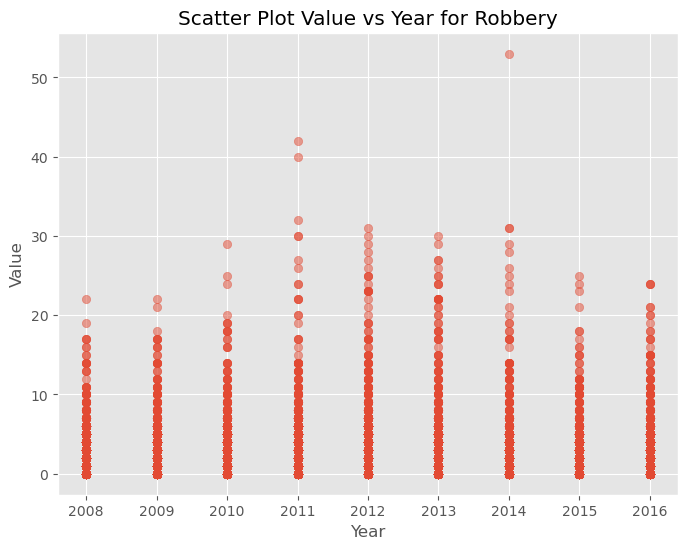

In [91]:
# Scatter plot "value" vs "year" hanya untuk kategori mayor "Robbery"
robbery_data = df_lon[df_lon['major_category'] == 'Robbery']
plt.figure(figsize=(8, 6))
plt.scatter(robbery_data['year'], robbery_data['value'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Scatter Plot Value vs Year for Robbery')
plt.show()

Scatter Plot untuk Melihat Korelasi "value" dengan "month" untuk melihat apakah ada pola musiman dalam data.

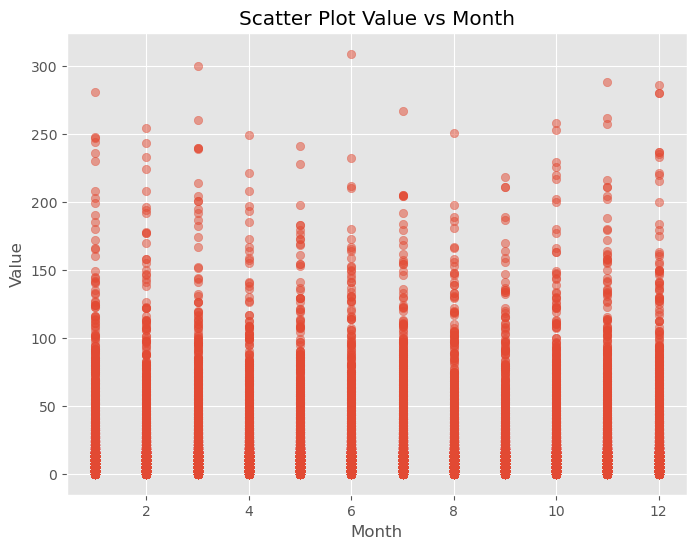

In [92]:
# Scatter plot "value" vs "month"
plt.figure(figsize=(8, 6))
plt.scatter(df_lon['month'], df_lon['value'], alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Scatter Plot Value vs Month')
plt.show()

In [93]:
df_city_london = df_lon[df_lon['borough'] == 'City of London']
df_city_london = df_city_london.groupby('year')['value'].sum().reset_index()
print(df_city_london)

   year  value
0  2008      0
1  2009      0
2  2010      0
3  2011     69
4  2012    157
5  2013    110
6  2014    115
7  2015    151
8  2016    178


<Axes: xlabel='year', ylabel='value'>

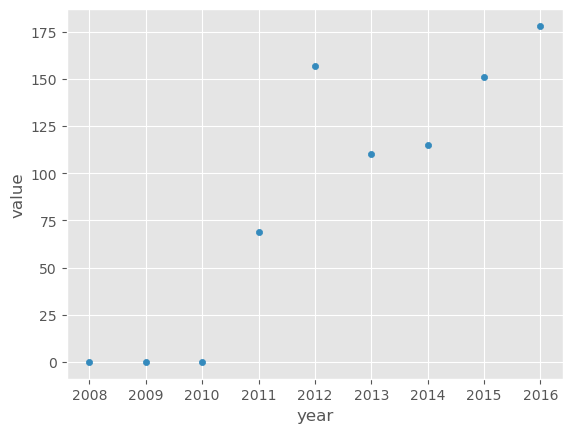

In [94]:
df_city_london.plot.scatter(x='year', y='value')

## Word Clouds

In [95]:
from wordcloud import WordCloud, STOPWORDS
print('wordcloud is installed and imported!')

wordcloud is installed and imported!


In [96]:
# Mengelompokkan data berdasarkan "minor_category" dan menghitung total "value"
minor_category_counts = df_lon.groupby('minor_category')['value'].sum().reset_index()
minor_category_counts = minor_category_counts.sort_values(by='value', ascending=False)
minor_category_counts.head()

,minor_category,value
21,Other Theft,980085
27,Theft From Motor Vehicle,569956
2,Burglary in a Dwelling,491282
12,Harassment,458124
0,Assault with Injury,451001


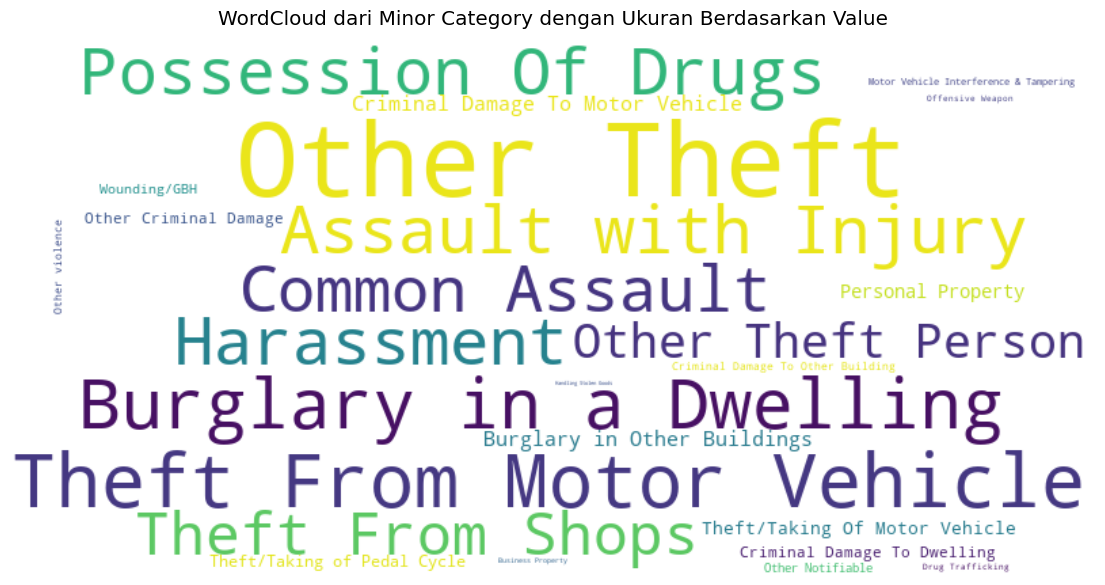

In [97]:
minor_category_dict = dict(zip(minor_category_counts['minor_category'], minor_category_counts['value']))

# Mengatur ukuran WordCloud sesuai dengan nilai
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(minor_category_dict)

# Menampilkan WordCloud
plt.figure(figsize=(14, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Minor Category dengan Ukuran Berdasarkan Value')
plt.show()

In [98]:
df_TopBorough.head(10)

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024
7,Croydon,260294
8,Ealing,251562
18,Islington,230286
29,Tower Hamlets,228613
3,Brent,227551


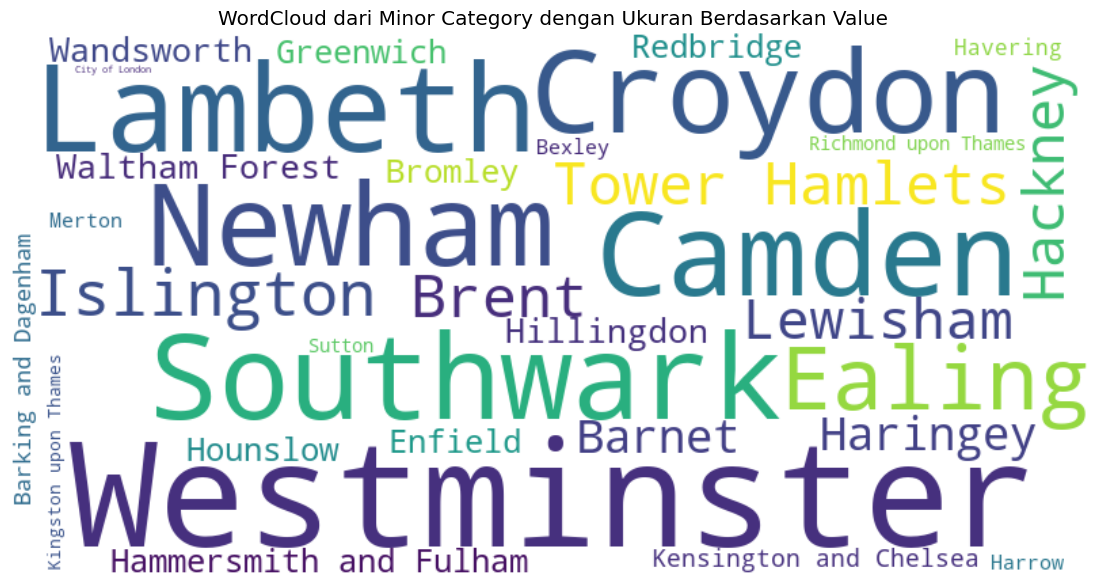

In [99]:
df_TopBorough_dict = dict(zip(df_TopBorough['borough'], df_TopBorough['value']))

# Mengatur ukuran WordCloud sesuai dengan nilai
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df_TopBorough_dict)

# Menampilkan WordCloud
plt.figure(figsize=(14, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Minor Category dengan Ukuran Berdasarkan Value')
plt.show()

## Folium Maps

In [100]:
import folium

In [101]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [102]:
# define the world map centered around London with a low zoom level
world_map = folium.Map(location=[51.509865, -0.118092], zoom_start=14)  # latitude longitude

# display world map
world_map

In [103]:
# Stamen Toner
world_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12, tiles='Stamen Toner') 
world_map

In [104]:
# Stamen Toner
world_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12, tiles='Stamen Terrain') 
world_map

In [105]:
df_TopBorough

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024
7,Croydon,260294
8,Ealing,251562
18,Islington,230286
29,Tower Hamlets,228613
3,Brent,227551


In [106]:
# from geopy.geocoders import Nominatim

# # Fungsi untuk mendapatkan koordinat berdasarkan borough menggunakan Geopy
# def get_coordinates(borough):
#     geolocator = Nominatim(user_agent="geoapiExercises")
#     location = geolocator.geocode(f"{borough}, London, UK")
#     if location:
#         return location.latitude, location.longitude
#     else:
#         return None, None

# # Mendapatkan koordinat untuk setiap borough
# df_TopBorough['latitude'], df_TopBorough['longitude'] = zip(*df_TopBorough['borough'].apply(get_coordinates))

# # Tampilkan dataframe lengkap
# print(df_TopBorough)

In [107]:
# !conda install -c conda-forge geopy

### Informasi yang terkumpul

1. Data sudah bersih, tidak ditemukan data kosong dan duplikat.
2. kejahatan tertinggi ada di bulan juli 2012 sebanyak 309 di distrik Tower Hamlets
3. Total kejahatan terbanyak ada di distrik Westminster sebanyak 455028 sebnayak 59226 kejahatan
4. City of London adalah distrik dengan jumlah kejahatan paling kecil yaitu 780 selama rentang 2008-2016
5. Frekuensi Major category tertinggi adalah Theft and Handling sebanyak 29,4% dan paling rendah adalah Sexual Offences yaitu 0,8%
6. tidak ada korelasi antara value dan year. setiap tahun memiliki jumlah kejahatan beragam.
7. jumlah kejahatan di City of London cenderung meningkat 
8. tidak ada data longitude dan latitude setiap distrik untuk diimplementasikan ke folium map